<a href="https://colab.research.google.com/github/rayanavieira/curso-python/blob/main/Obesity_Rayana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pandas: para carregar e manipular os dados.
#numpy: suporte a cálculos numéricos.
#sklearn: ferramentas de machine learning (pré-processamento, modelos, avaliação).
#seaborn/matplotlib: visualizações (gráficos, matrizes de confusão).

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. Carregar os dados
df = pd.read_csv('obesity.csv')

In [14]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.00,1,0,2.0,3.0,2,0,2.00,0,0.00,1.000,3,3,1
1,0,21,1.52,56.00,1,0,3.0,3.0,2,1,3.00,1,3.00,0.000,2,3,1
2,1,23,1.80,77.00,1,0,2.0,3.0,2,0,2.00,0,2.00,1.000,1,3,1
3,1,27,1.80,87.00,0,0,3.0,3.0,2,0,2.00,0,2.00,0.000,1,4,5
4,1,22,1.78,89.80,0,0,2.0,1.0,2,0,2.00,0,0.00,0.000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,2,0,1.73,0,1.68,0.906,2,3,4
2107,0,22,1.75,133.74,1,1,3.0,3.0,2,0,2.01,0,1.34,0.599,2,3,4
2108,0,23,1.75,133.69,1,1,3.0,3.0,2,0,2.05,0,1.41,0.646,2,3,4
2109,0,24,1.74,133.35,1,1,3.0,3.0,2,0,2.85,0,1.14,0.586,2,3,4


In [4]:
# 2. Verificar dados faltantes
print("Dados faltantes:\n", df.isnull().sum())

Dados faltantes:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [5]:
# 3. Codificação de variáveis categóricas
#(Identifica colunas categóricas (tipo texto)).
# Converte essas categorias em números inteiros usando LabelEncoder. Isso é necessário porque a maioria dos modelos de ML não lida com texto diretamente.
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
# 4. Separar features e target
# X: todas as colunas exceto a de destino (NObeyesdad), que indica o tipo de obesidade.
# y: a variável alvo (classe a ser prevista)

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [7]:
# 5. Dividir os dados em treino e teste
# Divide os dados em 80% para treino e 20% para teste.
# stratify=y garante que as classes sejam proporcionais em ambas as partes.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# 6. Normalização
# StandardScaler transforma os dados para terem média 0 e desvio padrão 1.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# 7. Treinar modelo Random Forest
# Usa um Random Forest, que é um conjunto de várias árvores de decisão.
# n_estimators=100: usa 100 árvores para melhorar a generalização.

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# 8. Predição e avaliação
y_pred = clf.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.83      0.98      0.90        58
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.94      0.88      0.91        58
           6       0.96      0.93      0.95        58

    accuracy                           0.95       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423



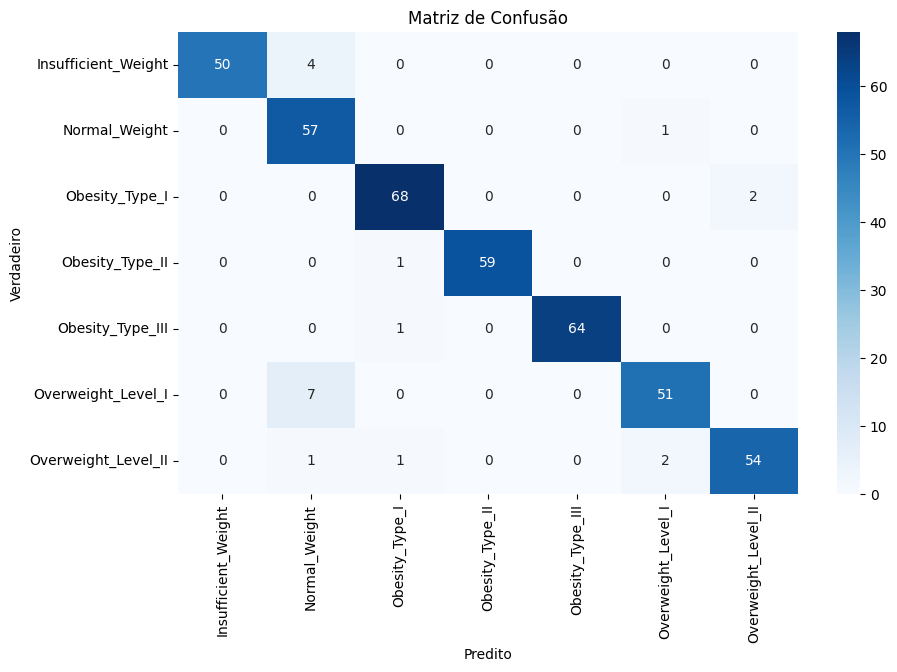

In [13]:
# 9. Matriz de confusão
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['NObeyesdad'].classes_,
            yticklabels=label_encoders['NObeyesdad'].classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()